In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/kobe.csv')

In [3]:
data.head(10)

action_type combined_shot_type  game_event_id   game_id      lat  \
0          Jump Shot          Jump Shot             10  20000012  33.9723   
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   
5          Jump Shot          Jump Shot            244  20000012  34.0553   
6         Layup Shot              Layup            251  20000012  34.0443   
7          Jump Shot          Jump Shot            254  20000012  34.0163   
8          Jump Shot          Jump Shot            265  20000012  33.9363   
9  Running Jump Shot          Jump Shot            294  20000012  33.9193   

   loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0    167     72 -118.1028                 10       1  ...  2PT Field Goal   
1   -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2   -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3    138    175 -118.1318                  6       1  ...  2PT Field Goal   
4      0      0 -118.2698                  6       2  ...  2PT Field Goal   
5   -145    -11 -118.4148                  9       3  ...  2PT Field Goal   
6      0      0 -118.2698                  8       3  ...  2PT Field Goal   
7      1     28 -118.2688                  8       3  ...  2PT Field Goal   
8    -65    108 -118.3348                  6       3  ...  2PT Field Goal   
9    -33    125 -118.3028                  3       3  ...  2PT Field Goal   

          shot_zone_area        shot_zone_basic  shot_zone_range     team_id  \
0          Right Side(R)              Mid-Range        16-24 ft.  1610612747   
1           Left Side(L)              Mid-Range         8-16 ft.  1610612747   
2   Left Side Center(LC)              Mid-Range        16-24 ft.  1610612747   
3  Right Side Center(RC)              Mid-Range        16-24 ft.  1610612747   
4              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
5           Left Side(L)              Mid-Range         8-16 ft.  1610612747   
6              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
7              Center(C)        Restricted Area  Less Than 8 ft.  1610612747   
8           Left Side(L)  In The Paint (Non-RA)         8-16 ft.  1610612747   
9              Center(C)  In The Paint (Non-RA)         8-16 ft.  1610612747   

            team_name   game_date    matchup opponent  shot_id  
0  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        1  
1  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        2  
2  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        3  
3  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        4  
4  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        5  
5  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        6  
6  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        7  
7  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        8  
8  Los Angeles Lakers  2000-10-31  LAL @ POR      POR        9  
9  Los Angeles Lakers  2000-10-31  LAL @ POR      POR       10  

[10 rows x 25 columns]

In [4]:
def resumetable(df):
    print(f'DataFrame shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtype'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'column_name'})
    summary['Missing'] = df.isnull().sum().values
    #Íµ¨Î∂ÑÎêòÎäî Í≥†Ïú≥Í∞í Í∞úÏàòÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§
    summary['Different Values'] = df.nunique().values
    #Ïñ¥Îñ§ Í∞íÎì§Ïù¥ ÏûÖÎ†•ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ 3Î≤àÏß∏ Ìï≠Î™©ÍπåÏßÄ ÌëúÍ∏∞
    summary['1er valeur'] = df.loc[0].values
    summary['2e valeur'] = df.loc[1].values
    summary['3e valeur'] = df.loc[2].values
    summary['4e valeur'] = df.loc[3].values
    summary['5e valeur'] = df.loc[4].values
    
    return summary

resumetable(data)

DataFrame shape: (30697, 25)


column_name    dtype  Missing  Different Values  \
0          action_type   object        0                57   
1   combined_shot_type   object        0                 6   
2        game_event_id    int64        0               620   
3              game_id    int64        0              1559   
4                  lat  float64        0               457   
5                loc_x    int64        0               489   
6                loc_y    int64        0               457   
7                  lon  float64        0               489   
8    minutes_remaining    int64        0                12   
9               period    int64        0                 7   
10            playoffs    int64        0                 2   
11              season   object        0                20   
12   seconds_remaining    int64        0                60   
13       shot_distance    int64        0                74   
14      shot_made_flag  float64     5000                 2   
15           shot_type   object        0                 2   
16      shot_zone_area   object        0                 6   
17     shot_zone_basic   object        0                 7   
18     shot_zone_range   object        0                 5   
19             team_id    int64        0                 1   
20           team_name   object        0                 1   
21           game_date   object        0              1559   
22             matchup   object        0                74   
23            opponent   object        0                33   
24             shot_id    int64        0             30697   

            1er valeur           2e valeur             3e valeur  \
0            Jump Shot           Jump Shot             Jump Shot   
1            Jump Shot           Jump Shot             Jump Shot   
2                   10                  12                    35   
3             20000012            20000012              20000012   
4              33.9723             34.0443               33.9093   
5                  167                -157                  -101   
6                   72                   0                   135   
7            -118.1028           -118.4268             -118.3708   
8                   10                  10                     7   
9                    1                   1                     1   
10                   0                   0                     0   
11             2000-01             2000-01               2000-01   
12                  27                  22                    45   
13                  18                  15                    16   
14                 NaN                 0.0                   1.0   
15      2PT Field Goal      2PT Field Goal        2PT Field Goal   
16       Right Side(R)        Left Side(L)  Left Side Center(LC)   
17           Mid-Range           Mid-Range             Mid-Range   
18           16-24 ft.            8-16 ft.             16-24 ft.   
19          1610612747          1610612747            1610612747   
20  Los Angeles Lakers  Los Angeles Lakers    Los Angeles Lakers   
21          2000-10-31          2000-10-31            2000-10-31   
22           LAL @ POR           LAL @ POR             LAL @ POR   
23                 POR                 POR                   POR   
24                   1                   2                     3   

                4e valeur           5e valeur  
0               Jump Shot   Driving Dunk Shot  
1               Jump Shot                Dunk  
2                      43                 155  
3                20000012            20000012  
4                 33.8693             34.0443  
5                     138                   0  
6                     175                   0  
7               -118.1318           -118.2698  
8                       6                   6  
9                       1                   2  
10                      0                   0  
11                2000-01             2000-01  
12   

## Data Visualisation

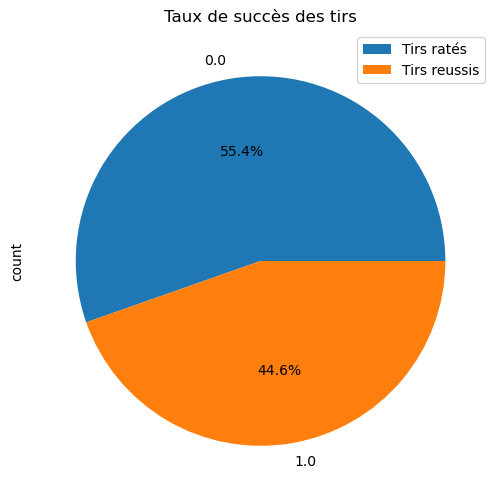

In [5]:
# Camembert des tirs en moyenne 
data['shot_made_flag'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Taux de succ√®s des tirs')
plt.legend(['Tirs rateÃÅs', 'Tirs reussis'])
plt.show()

On observe que les tirs de Kobe sont l√©g√®rement d√©s√©quilibr√©s en faveur du tir rat√©. Ce sera √† prendre √† compte lors de la construction du mod√®le.

season
1996-97    0.422977
1997-98    0.430864
1998-99    0.458824
1999-00    0.460366
2000-01    0.466667
2001-02    0.458431
2002-03    0.436285
2003-04    0.433260
2004-05    0.436557
2005-06    0.453742
2006-07    0.457885
2007-08    0.468389
2008-09    0.467855
2009-10    0.453725
2010-11    0.446417
2011-12    0.425847
2012-13    0.457831
2013-14    0.406780
2014-15    0.376054
2015-16    0.356223
Name: shot_made_flag, dtype: float64


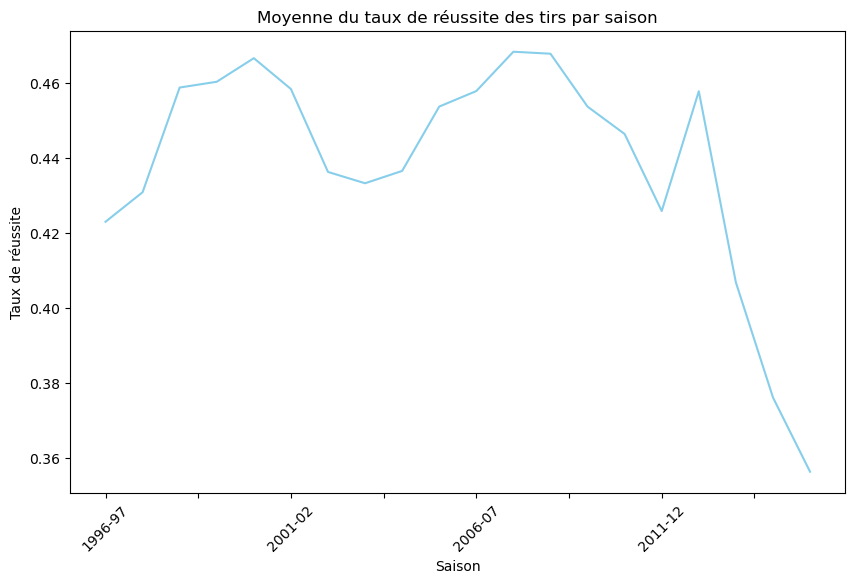

In [6]:
# Calculer la moyenne du taux de r√©ussite des tirs par saison
success_rate_by_season = data.groupby('season')['shot_made_flag'].mean()

# Afficher la moyenne du taux de r√©ussite par saison
print(success_rate_by_season)

# Visualiser la moyenne du taux de r√©ussite des tirs par saison
success_rate_by_season.plot(kind='line', figsize=(10, 6), color='skyblue')
plt.title('Moyenne du taux de r√©ussite des tirs par saison')
plt.xlabel('Saison')
plt.ylabel('Taux de r√©ussite')
plt.xticks(rotation=45)
plt.show()

On observe une oscillation de la moyenne de tir entre 0.42 et 0.47 de la pr√©cision des tirs de Kobe, jusqu'en 2013-14 o√π celle-ci baisse jusqu'√† 0.35 en continue.

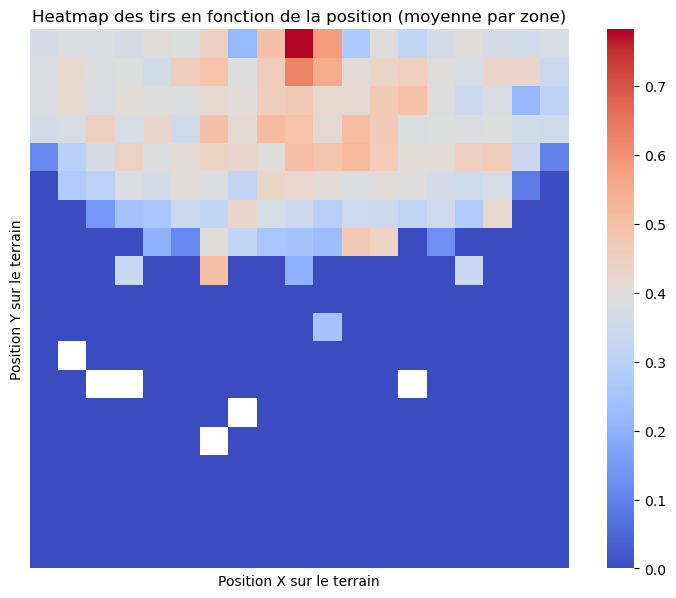

In [7]:
# D√©finition de la taille de la grille (plus petit = plus pr√©cis)
grid_size = 20  # Nombre de cases en X et Y

# Cr√©ation de la figure
plt.figure(figsize=(10, 7))

# Cr√©ation d'une grille pour regrouper les tirs
x_bins = np.linspace(data['loc_x'].min(), data['loc_x'].max(), grid_size)
y_bins = np.linspace(data['loc_y'].min(), data['loc_y'].max(), grid_size)

# Calcul du nombre de tirs r√©ussis et tent√©s par zone
heatmap_data = np.zeros((grid_size-1, grid_size-1))

for i in range(grid_size-1):
    for j in range(grid_size-1):
        # S√©lection des tirs dans cette zone
        shots_in_cell = data[
            (data['loc_x'] >= x_bins[i]) & (data['loc_x'] < x_bins[i+1]) & 
            (data['loc_y'] >= y_bins[j]) & (data['loc_y'] < y_bins[j+1])
        ]
        
        # Calcul du taux de r√©ussite (√©vite division par z√©ro)
        if len(shots_in_cell) > 0:
            heatmap_data[j, i] = shots_in_cell['shot_made_flag'].mean()

# Affichage de la heatmap sous forme de carr√©s
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, square=True, 
            xticklabels=False, yticklabels=False, cbar=True)

# Ajout du titre
plt.title("Heatmap des tirs en fonction de la position (moyenne par zone)")
plt.xlabel("Position X sur le terrain")
plt.ylabel("Position Y sur le terrain")

plt.show()


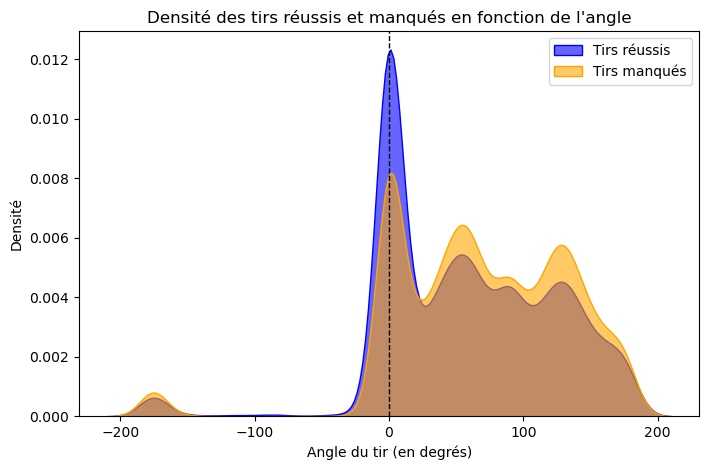

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcul des angles
angles_made = np.arctan2(data[data['shot_made_flag'] == 1]['loc_y'], data[data['shot_made_flag'] == 1]['loc_x']) * 180 / np.pi
angles_missed = np.arctan2(data[data['shot_made_flag'] == 0]['loc_y'], data[data['shot_made_flag'] == 0]['loc_x']) * 180 / np.pi

# Cr√©ation de la figure
plt.figure(figsize=(8, 5))

# Courbes de densit√©
sns.kdeplot(angles_made, fill=True, label="Tirs r√©ussis", color="blue", alpha=0.6)
sns.kdeplot(angles_missed, fill=True, label="Tirs manqu√©s", color="orange", alpha=0.6)

# Ajout des axes et l√©gendes
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Ligne centrale (face au panier)
plt.xlabel("Angle du tir (en degr√©s)")
plt.ylabel("Densit√©")
plt.title("Densit√© des tirs r√©ussis et manqu√©s en fonction de l'angle")
plt.legend()
plt.show()


Fort pic √† 0¬∞ ‚Üí La majorit√© des tirs sont pris face au panier. Ces tirs ont un taux de r√©ussite plus √©lev√© (courbe bleue plus haute que la courbe orange).  
Asym√©trie droite/gauche ‚Üí Plus de tirs sont tent√©s du c√¥t√© droit du terrain (>0¬∞), mais la proportion de tirs manqu√©s y est plus √©lev√©e qu'√† 0¬∞.  
Faible densit√© √† -100¬∞ / -200¬∞ ‚Üí Tr√®s peu de tirs sont tent√©s depuis ces angles, ce qui peut indiquer une faible vari√©t√© des tirs en dehors des positions classiques.  

üí° Insights pour un Mod√®le de Pr√©diction  
‚úÖ L‚Äôangle du tir est une variable cl√© ‚Üí Il influence directement la probabilit√© de r√©ussite.  
‚úÖ Le pic de r√©ussite √† 0¬∞ peut √™tre un bon indicateur ‚Üí Prendre en compte la proximit√© angulaire avec cette zone.  
‚úÖ L'asym√©trie droite/gauche peut √™tre test√©e ‚Üí Int√©grer loc_x et angle comme features pour voir si un c√¥t√© est r√©ellement plus favorable.  
‚úÖ Tirer plus loin du panier ou avec un angle extr√™me semble risqu√© ‚Üí La distance et l‚Äôangle doivent √™tre combin√©s dans le mod√®le.

Tirs c√¥t√© gauche: 11541 (45.76%)
Tirs c√¥t√© droit: 13681 (54.24%)

R√©ussite √† gauche: 3889 tirs (33.70%)
R√©ussite √† droite: 4741 tirs (34.65%)

√âchec √† gauche: 7652 tirs (66.30%)
√âchec √† droite: 8940 tirs (65.35%)


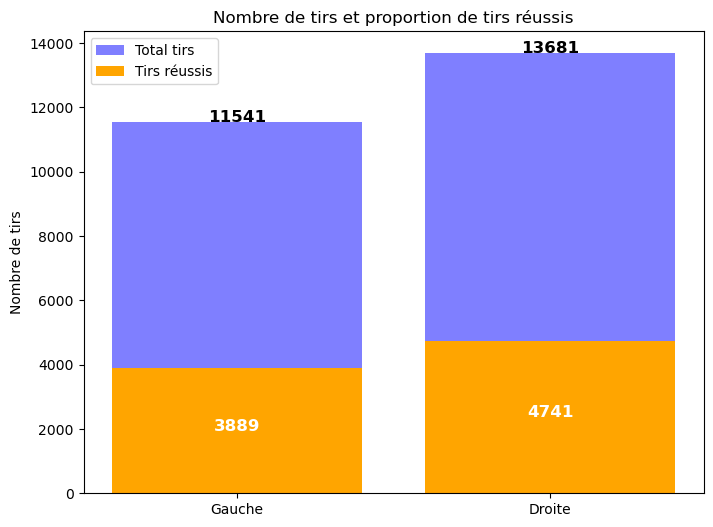

In [10]:
# S√©parer les tirs en deux moiti√©s : gauche (x < 0) et droite (x > 0)
left_shots = data[data['loc_x'] < 0]
right_shots = data[data['loc_x'] > 0]

# Nombre total de tirs de chaque c√¥t√©
left_total = left_shots.shape[0]
right_total = right_shots.shape[0]
total_shots = left_total + right_total

# Calcul du ratio de tirs √† gauche vs √† droite
left_ratio = left_total / total_shots * 100
right_ratio = right_total / total_shots * 100

# Proportion de tirs r√©ussis par c√¥t√©
left_made = left_shots[left_shots['shot_made_flag'] == 1].shape[0]
right_made = right_shots[right_shots['shot_made_flag'] == 1].shape[0]

# Proportion de tirs rat√©s par c√¥t√©
left_missed = left_total - left_made
right_missed = right_total - right_made

left_made_ratio = left_made / left_total * 100 if left_total > 0 else 0
right_made_ratio = right_made / right_total * 100 if right_total > 0 else 0


left_missed_ratio = left_missed / left_total * 100 if left_total > 0 else 0
right_missed_ratio = right_missed / right_total * 100 if right_total > 0 else 0

# Cr√©ation du graphique fusionn√©
fig, ax = plt.subplots(figsize=(8, 6))

x_labels = ["Gauche", "Droite"]
x = range(len(x_labels))

# Barre totale repr√©sentant le nombre de tirs
ax.bar(x, [left_total, right_total], color='blue', alpha=0.5, label="Total tirs")

# Barre interne pour les tirs r√©ussis (en vert)
ax.bar(x, [left_made, right_made], color='orange', label="Tirs r√©ussis")

# Ajout des annotations pour indiquer les valeurs
for i, (total, made) in enumerate(zip([left_total, right_total], [left_made, right_made])):
    ax.text(i, total + 2, f"{total}", ha='center', fontsize=12, fontweight='bold')  # Total tirs
    ax.text(i, made / 2, f"{made}", ha='center', color='white', fontsize=12, fontweight='bold')  # Tirs r√©ussis

# Affichage des r√©sultats
print(f"Tirs c√¥t√© gauche: {left_total} ({left_ratio:.2f}%)")
print(f"Tirs c√¥t√© droit: {right_total} ({right_ratio:.2f}%)\n")

print(f"R√©ussite √† gauche: {left_made} tirs ({left_made_ratio:.2f}%)")
print(f"R√©ussite √† droite: {right_made} tirs ({right_made_ratio:.2f}%)\n")

print(f"√âchec √† gauche: {left_missed} tirs ({left_missed_ratio:.2f}%)")
print(f"√âchec √† droite: {right_missed} tirs ({right_missed_ratio:.2f}%)")

# Configuration du graphique
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_title("Nombre de tirs et proportion de tirs r√©ussis")
ax.set_ylabel("Nombre de tirs")
ax.legend()

plt.show()


Les joueurs semblent privil√©gier le c√¥t√© droit, soit par confort (main dominante), soit par strat√©gie offensive.

La r√©ussite est l√©g√®rement meilleure √† droite, mais l'√©cart est trop faible pour √™tre une vraie faiblesse du c√¥t√© gauche.

Un mod√®le de pr√©diction pourrait int√©grer cette asym√©trie pour voir si elle varie selon d'autres facteurs (distance, type de tir, d√©fense).

/tmp/ipykernel_13829/2567634062.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(zone_data['shot_zone_area'], rotation=30, ha='right')


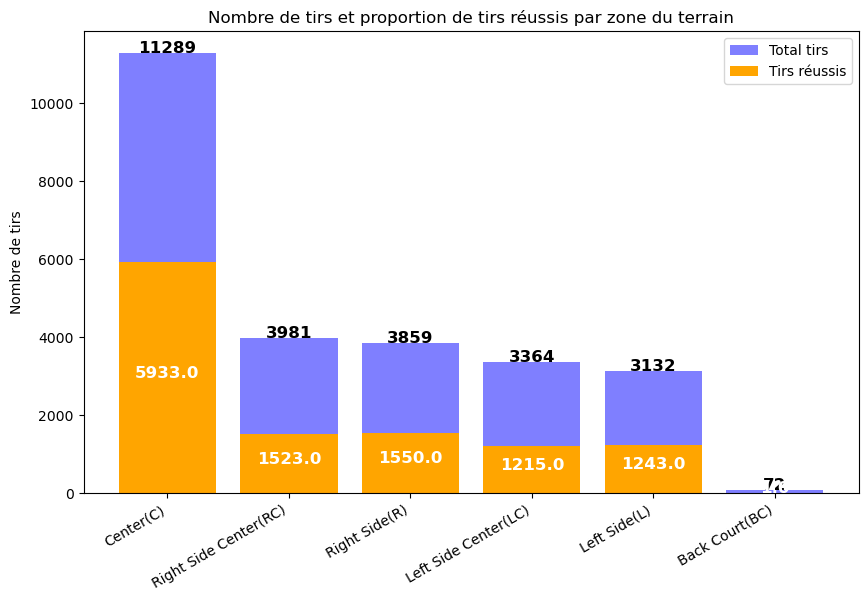

Zone: Center(C)
 - Total tirs: 11289
 - Tirs r√©ussis: 5933.0 (52.56%)
 - Tirs rat√©s: 5356.0

Zone: Right Side Center(RC)
 - Total tirs: 3981
 - Tirs r√©ussis: 1523.0 (38.26%)
 - Tirs rat√©s: 2458.0

Zone: Right Side(R)
 - Total tirs: 3859
 - Tirs r√©ussis: 1550.0 (40.17%)
 - Tirs rat√©s: 2309.0

Zone: Left Side Center(LC)
 - Total tirs: 3364
 - Tirs r√©ussis: 1215.0 (36.12%)
 - Tirs rat√©s: 2149.0

Zone: Left Side(L)
 - Total tirs: 3132
 - Tirs r√©ussis: 1243.0 (39.69%)
 - Tirs rat√©s: 1889.0

Zone: Back Court(BC)
 - Total tirs: 72
 - Tirs r√©ussis: 1.0 (1.39%)
 - Tirs rat√©s: 71.0



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouper les tirs par zone du terrain
zone_data = data.groupby('shot_zone_area').agg(
    total_shots=('shot_made_flag', 'size'),
    made_shots=('shot_made_flag', 'sum')
).reset_index()

# Calcul des tirs rat√©s et des ratios de r√©ussite
zone_data['missed_shots'] = zone_data['total_shots'] - zone_data['made_shots']
zone_data['made_ratio'] = (zone_data['made_shots'] / zone_data['total_shots']) * 100

# Trier les zones pour un affichage coh√©rent
zone_data = zone_data.sort_values(by='total_shots', ascending=False)

# Cr√©ation du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barre totale repr√©sentant le nombre de tirs
ax.bar(zone_data['shot_zone_area'], zone_data['total_shots'], color='blue', alpha=0.5, label="Total tirs")

# Barre interne pour les tirs r√©ussis (en orange)
ax.bar(zone_data['shot_zone_area'], zone_data['made_shots'], color='orange', label="Tirs r√©ussis")

# Ajout des annotations pour les valeurs
for i, (total, made) in enumerate(zip(zone_data['total_shots'], zone_data['made_shots'])):
    ax.text(i, total + 2, f"{total}", ha='center', fontsize=12, fontweight='bold')  # Total tirs
    ax.text(i, made / 2, f"{made}", ha='center', color='white', fontsize=12, fontweight='bold')  # Tirs r√©ussis

# Configuration du graphique
ax.set_xticklabels(zone_data['shot_zone_area'], rotation=30, ha='right')
ax.set_title("Nombre de tirs et proportion de tirs r√©ussis par zone du terrain")
ax.set_ylabel("Nombre de tirs")
ax.legend()

plt.show()

# Affichage des r√©sultats par zone
for _, row in zone_data.iterrows():
    print(f"Zone: {row['shot_zone_area']}")
    print(f" - Total tirs: {row['total_shots']}")
    print(f" - Tirs r√©ussis: {row['made_shots']} ({row['made_ratio']:.2f}%)")
    print(f" - Tirs rat√©s: {row['missed_shots']}\n")


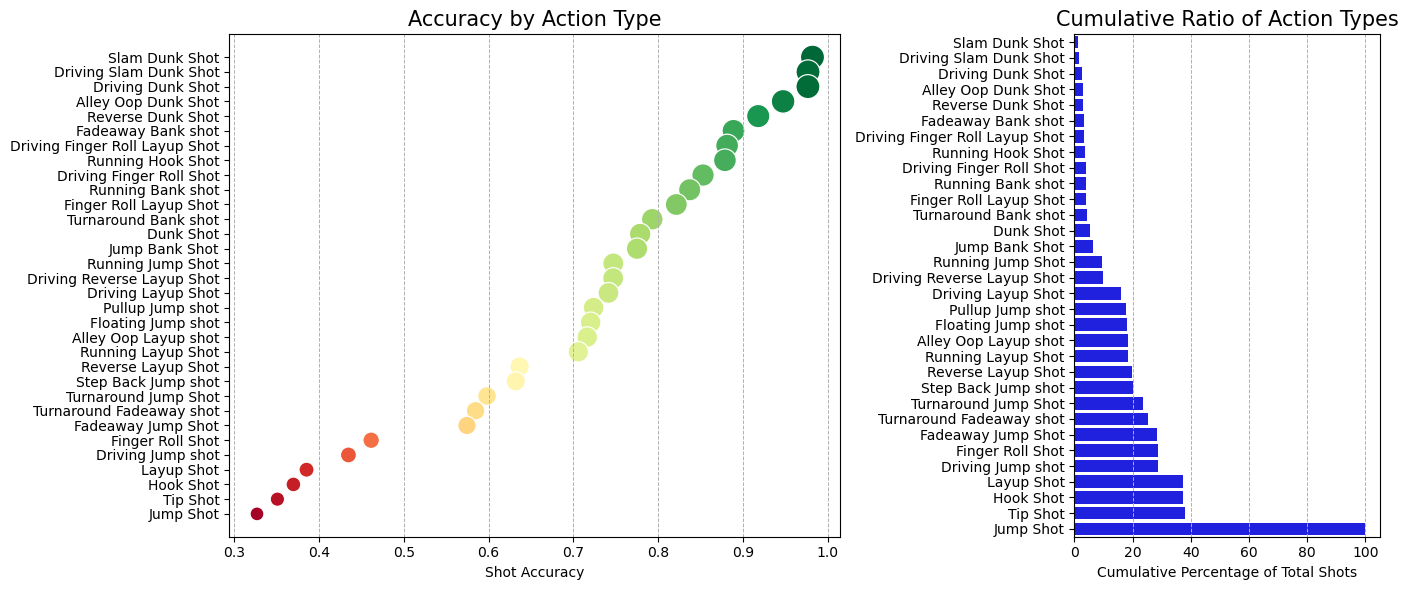

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by action_type and calculate accuracy and counts
grouped_data = data.groupby('action_type').agg(
    Accuracy=('shot_made_flag', 'mean'),
    counts=('shot_made_flag', 'size')
).reset_index()

# Filter out action types with counts <= 20
filtered_data = grouped_data[grouped_data['counts'] > 20]

# **Tri global bas√© sur Accuracy**
filtered_data = filtered_data.sort_values(by='Accuracy', ascending=False)  # **Trier par ordre d√©croissant**

# **Cr√©er un ordre fixe des cat√©gories**
action_order = filtered_data['action_type'].tolist()

# Calcul du ratio des tirs par action type
filtered_data['ratio'] = filtered_data['counts'] / filtered_data['counts'].sum() * 100

# **Ajout d'une colonne pour le ratio cumul√©**
filtered_data['cumulative_ratio'] = filtered_data['ratio'].cumsum()

# Cr√©ation des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# Graphique 1 : Accuracy par type d'action
sns.scatterplot(
    data=filtered_data,
    x='Accuracy',
    y='action_type',
    hue='Accuracy',
    size='Accuracy',
    sizes=(100, 300),
    palette=sns.color_palette("RdYlGn", as_cmap=True),
    legend=False,
    ax=axes[0]
)

# **On applique le m√™me ordre aux deux graphiques**
axes[0].set_yticks(range(len(action_order)))
axes[0].set_yticklabels(action_order)

# Personnalisation
axes[0].set_title("Accuracy by Action Type", fontsize=15)
axes[0].set_ylabel('')
axes[0].set_xlabel('Shot Accuracy')
axes[0].grid(True, axis='x', linestyle='--', linewidth=0.7)

# Graphique 2 : Ratio des types d'actions CUMUL√â
sns.barplot(
    data=filtered_data,
    y='action_type',
    x='cumulative_ratio',  # **Utilisation du ratio cumul√©**
    color="blue",  # Uniformisation de la couleur
    order=action_order,
    ax=axes[1]
)


# Personnalisation
axes[1].set_title("Cumulative Ratio of Action Types", fontsize=15)
axes[1].set_ylabel('')
axes[1].set_xlabel('Cumulative Percentage of Total Shots')
axes[1].grid(True, axis='x', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()


Le type de tir est le facteur le plus influent. Les dunks et layups ont un taux de r√©ussite √©lev√©, tandis que les jump shots et tirs √† distance sont plus risqu√©s. La distance et la position sont d√©terminantes : plus loin du panier, plus la probabilit√© de r√©ussite diminue.

Le temps restant et la pression d√©fensive peuvent impacter la r√©ussite. Transformer les coordonn√©es en distance et angle simplifie l‚Äôanalyse spatiale. Un Random Forest ou XGBoost capturera les interactions non lin√©aires.

Le mod√®le utilisera shot_distance, action_type, loc_x, loc_y, shot_type, period, shot_clock. Une validation crois√©e √©vitera le sur-apprentissage. L‚Äô√©valuation se fera avec Accuracy, F1-score et AUC-ROC.

Les tirs avec le meilleur taux de r√©ussite (dunks, layups) sont les moins tent√©s, alors que les tirs les plus fr√©quents (jump shots) ont un faible taux de r√©ussite.

Le jump shot domine en volume mais affiche une pr√©cision bien inf√©rieure aux tirs pr√®s du panier. Cette tendance refl√®te l‚Äô√©volution du jeu vers des tirs √† distance et des strat√©gies bas√©es sur l‚Äôespace, mais elle souligne aussi une inefficacit√© potentielle.

Un mod√®le pourrait aider √† optimiser la prise de d√©cision, en recommandant des tirs plus efficaces selon la position et le contexte du match. Il permettrait aussi de d√©tecter les joueurs qui prennent trop de tirs difficiles et d‚Äôadapter leur s√©lection de tirs.

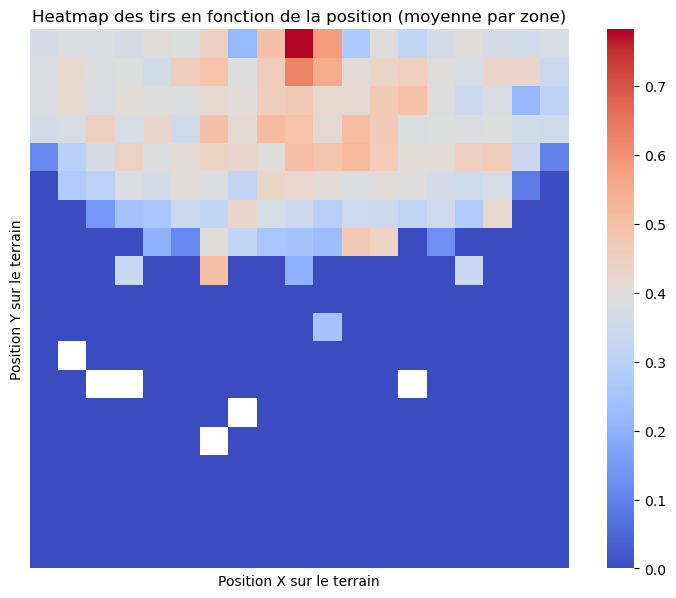

In [ ]:
# D√©finition de la taille de la grille (plus petit = plus pr√©cis)
grid_size = 20  # Nombre de cases en X et Y

# Cr√©ation de la figure
plt.figure(figsize=(10, 7))

# Cr√©ation d'une grille pour regrouper les tirs
x_bins = np.linspace(data['loc_x'].min(), data['loc_x'].max(), grid_size)
y_bins = np.linspace(data['loc_y'].min(), data['loc_y'].max(), grid_size)

# Calcul du nombre de tirs r√©ussis et tent√©s par zone
heatmap_data = np.zeros((grid_size-1, grid_size-1))

for i in range(grid_size-1):
    for j in range(grid_size-1):
        # S√©lection des tirs dans cette zone
        shots_in_cell = data[
            (data['loc_x'] >= x_bins[i]) & (data['loc_x'] < x_bins[i+1]) & 
            (data['loc_y'] >= y_bins[j]) & (data['loc_y'] < y_bins[j+1])
        ]
        
        # Calcul du taux de r√©ussite (√©vite division par z√©ro)
        if len(shots_in_cell) > 0:
            heatmap_data[j, i] = shots_in_cell['shot_made_flag'].mean()

# Affichage de la heatmap sous forme de carr√©s
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, square=True, 
            xticklabels=False, yticklabels=False, cbar=True)

# Ajout du titre
plt.title("Heatmap des tirs en fonction de la position (moyenne par zone)")
plt.xlabel("Position X sur le terrain")
plt.ylabel("Position Y sur le terrain")

plt.show()


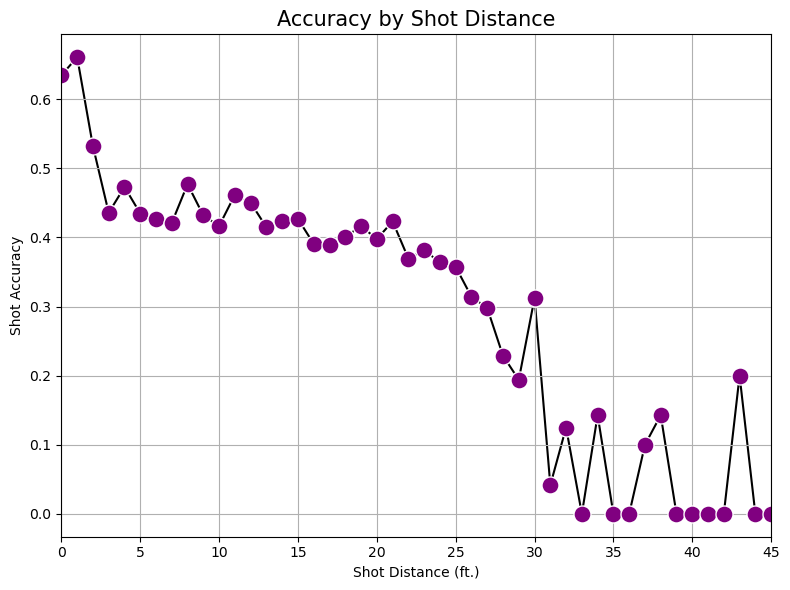

In [17]:
# Group by shot_distance and calculate mean accuracy
accuracy_by_distance = data.groupby('shot_distance')['shot_made_flag'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(
    data=accuracy_by_distance,
    x='shot_distance',
    y='shot_made_flag',
    s=150,
    color='purple',
    legend=False,
    zorder=2  # Set the order of scatter plot above line plot
)

# Line plot
sns.lineplot(
    data=accuracy_by_distance,
    x='shot_distance',
    y='shot_made_flag',
    marker='.',
    color='black',
    legend=False,
    zorder=1  # Set the order of line plot below scatter plot
)

plt.title('Accuracy by Shot Distance', fontsize=15)
plt.xlabel('Shot Distance (ft.)')
plt.ylabel('Shot Accuracy')
plt.xlim(0, 45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
nan_shots = data[data['shot_made_flag'].isna()]
data = data[~data.index.isin(nan_shots.index)]

In [12]:
corr_with_shot_made = data.corr()['shot_made_flag'].abs().sort_values(ascending=False)
print(corr_with_shot_made)

ValueError: could not convert string to float: 'Jump Shot'